# How to solve a sudoku

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline

In [44]:
import skimage
from skimage import io
from skimage.feature import canny
from skimage.transform import rescale
from skimage.morphology import dilation, disk
import cv2
from skimage.transform import ProjectiveTransform, warp
from sudoku import solve_sudoku
from skimage.feature import match_template

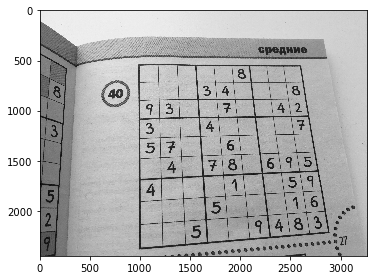

In [214]:
fname = './IMG_1263.JPG'
# fname = './scrable.jpg'
image_full = io.imread(fname, as_gray=True, plugin='matplotlib')
io.imshow(image_full)

In [215]:
def normalize_image(image_full):
    image_scaled = rescale(image_full, 0.3)
    edges = canny(image_scaled)
    #io.imshow(edges)
    selem = disk(1)
    edges = dilation(edges, selem)
    #io.imshow(edges)

    edges = (edges).astype(np.uint8)
        

    #fig, ax = plt.subplots()
    #ax.imshow(edges, cmap=plt.cm.gray)
        
    ext_contours = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
    
    #fig, ax = plt.subplots()
    #ax.imshow(edges, cmap=plt.cm.gray)

    contour = max(ext_contours, key=cv2.contourArea)
    #print(contour.shape)
    contour = contour.squeeze()
    #print(contour.shape)
    
    #fig, ax = plt.subplots()
    #ax.imshow(image_scaled, cmap=plt.cm.gray)
    #ax.plot(contour[:, 0], contour[:,  1], 'r')
    
    epsilon = 0.05 * cv2.arcLength(contour, True)
    corners = cv2.approxPolyDP(contour, epsilon, True).squeeze()
    
    #fig, ax = plt.subplots()
    #ax.imshow(image_scaled, cmap=plt.cm.gray)
    #ax.plot(corners[:, 0], corners[:, 1], '*r')
    
    sides=np.array([[0,0],[0,600],[600,600],[600,0]])
    sides1=np.array([[0,0],[0,252],[252,252],[252,0]])
        
    true_c=np.array([[0,0],[0,0],[0,0],[0,0]])
    for i in range(4):
        dist=[]
        for j in range(4):
            dist.append( ((corners[i][0]-sides[j][0])**2+(corners[i][1]-sides[j][1])**2)**(0.5) )
            #print(dist)
        true_c[i]=sides1[np.argmin(dist)]
    
    #true_c
    
    tform = ProjectiveTransform()
    tform.estimate(true_c, corners)
    image_warped = warp(image_scaled, tform)
    
    fig, ax=plt.subplots()
    ax.imshow(image_warped[:252, :252], cmap=plt.cm.gray)
    return(image_warped[:252, :252])

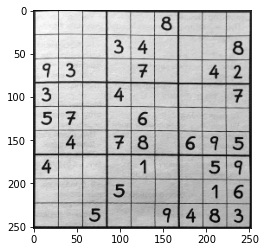

In [216]:
image_warped=normalize_image(image_full)

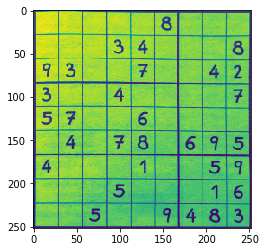

In [6]:
plt.imshow(image_warped)

In [217]:
def recognize_digits(image_warped): 
    from skimage.feature import match_template
    numb=[]
    for i in range(9):
        for j in range(9):
            numb.append(image_warped[i*28:(i+1)*28, j*28:28*(j+1)])
        
    tmpl=[]
    for i in range(0, 10):
        filename = "%d.jpg" % i
        image_full = io.imread(filename, as_gray=True, plugin='matplotlib')
        tmpl.append(image_full)
    
    
    for i in range(0, 10):
        filename = "%d" % i + "%d.jpg" % i
        image_full = io.imread(filename, as_gray=True, plugin='matplotlib')
        tmpl.append(image_full)
    
    
    
    new_tmpl1=[1-tmp>0.53 for tmp in tmpl]
    new_tmpl2=[1-tmp>0.555 for tmp in tmpl]
    new_tmpl3=[1-tmp>0.6 for tmp in tmpl]
    new_tmpl=new_tmpl1+new_tmpl2+new_tmpl3
    
    new_num=[1-tmp>0.6 for tmp in numb]

    arr=[['.' for i in range(9)] for j in range(9)]
    for i in range(len(numb)):
        result=[]
        for shift_0 in range(-2,3):
            for shift_1 in range(-2,3):
                for j in range(len(tmpl)):
                    number=new_num[i][4:24,4:24]
                    rolled = np.roll(number,axis=0,shift=shift_0)
                    rolled = np.roll(rolled,axis=1,shift=shift_1)
                    result.append(match_template(rolled, new_tmpl[j][4:24,4:24]))
                
        #print(result)
        k=np.argmax(result)
        arr[int(i//9)][int(i%9)]=k%10
        
          
    return arr
    rcParams['figure.figsize'] = 10, 10
    fig, ax=plt.subplots()
    ax.imshow(image_warped[:252, :252], cmap=plt.cm.gray)
    

In [184]:
image_warped
tmpl=[]
for i in range(0, 10):
    filename = "%d.jpg" % i
    image_full = io.imread(filename, as_gray=True, plugin='matplotlib')
    tmpl.append(image_full)
len(tmpl)

10

In [218]:
arr=recognize_digits(image_warped)
arr

[[0, 0, 0, 0, 0, 8, 0, 0, 0],
 [0, 0, 0, 3, 4, 0, 0, 0, 8],
 [9, 3, 0, 0, 7, 0, 0, 4, 2],
 [3, 0, 0, 4, 0, 0, 0, 0, 7],
 [5, 7, 0, 0, 6, 0, 0, 0, 0],
 [0, 4, 0, 7, 8, 0, 6, 9, 5],
 [4, 0, 0, 0, 1, 0, 0, 5, 9],
 [0, 0, 0, 5, 0, 0, 0, 1, 6],
 [0, 0, 5, 0, 0, 9, 4, 8, 3]]

# Here is recognized array

In [199]:
arr=[['.']*9]*9
arr

[['.', '.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.', '.'],
 ['.', '.', '.', '.', '.', '.', '.', '.', '.']]

In [66]:
arr

[[0, 0, 0, 0, 0, 8, 0, 0, 0],
 [0, 0, 0, 3, 4, 0, 0, 0, 8],
 [9, 3, 0, 0, 7, 0, 0, 4, 2],
 [3, 0, 0, 4, 0, 0, 0, 0, 7],
 [5, 7, 0, 0, 6, 0, 0, 0, 0],
 [0, 4, 0, 7, 8, 0, 6, 9, 5],
 [4, 0, 0, 0, 1, 0, 0, 5, 9],
 [0, 0, 0, 5, 0, 0, 0, 1, 6],
 [0, 0, 5, 0, 0, 9, 4, 8, 3]]

In [62]:
arr

[[0, 0, 0, 0, 0, 248, 0, 0, 0],
 [0, 0, 0, 243, 244, 0, 0, 0, 268],
 [249, 343, 0, 0, 247, 0, 0, 184, 242],
 [343, 0, 0, 424, 0, 0, 0, 0, 187],
 [245, 427, 0, 0, 246, 0, 0, 0, 0],
 [0, 424, 0, 427, 428, 0, 266, 289, 185],
 [424, 0, 0, 0, 241, 0, 0, 185, 289],
 [0, 0, 0, 245, 0, 0, 0, 161, 266],
 [0, 0, 245, 0, 0, 369, 444, 448, 383]]

# Solving the sudoku

[[6 2 4 9 5 8 3 7 1]
 [1 5 7 3 4 2 9 6 8]
 [9 3 8 1 7 6 5 4 2]
 [3 8 6 4 9 5 1 2 7]
 [5 7 9 2 6 1 8 3 4]
 [2 4 1 7 8 3 6 9 5]
 [4 6 3 8 1 7 2 5 9]
 [8 9 2 5 3 4 7 1 6]
 [7 1 5 6 2 9 4 8 3]]


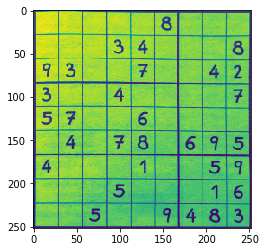

In [10]:
tmpl=[]
for i in range(0, 10):
    filename = "%d.jpg" % i
    image_full = io.imread(filename, as_gray=True, plugin='matplotlib')
    tmpl.append(image_full)


for i in range(0, 10):
    filename = "%d" % i + "%d.jpg" % i
    image_full = io.imread(filename, as_gray=True, plugin='matplotlib')
    tmpl.append(image_full)

final = solve_sudoku(arr)
#Solved sudoku
print(final)

res_solved=image_warped
plt.imshow(res_solved)

for i in range(9):
    for j in range(9):
        #print(arr[i][j])
        #print(final[i][j])
        if not(int(arr[i][j]) == int(final[i][j])):
            res_solved[(28*i+4):(28*(i+1)-4),(28*j+4):(28*(j+1)-4)] = tmpl[final[i][j]][4:24,4:24]

# And here's the final pic

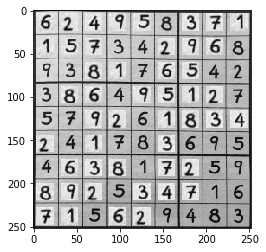

In [11]:
fig, ax=plt.subplots()
ax.imshow(image_warped[:252, :252], cmap=plt.cm.gray)